# Import Libraries

In [37]:
import pandas as pd
import requests
import io
from pandas_datareader import data as pdr
import yfinance as yf
from nltk.tokenize import RegexpTokenizer

yf.pdr_override() 

In [59]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


# Request access to the website for data

In [34]:
ticker_response=requests.get("https://www.sec.gov/include/ticker.txt")

# Convert the data into list

In [35]:
ticker=pd.read_csv(io.StringIO(ticker_response.text),delimiter='\t',header=None,usecols=[0])[0].to_list()

# Convert the ticker symbol to upper case

In [36]:
ticker=[str(ticker[i]).upper() for i in range(len(ticker))]

# Read the text data from from csv file of each week 

In [48]:
dataframe1=pd.read_csv('dataframeDec12Dec19.csv',header=None)

In [49]:
dataframe1.columns=['title','column2','column3','author','column5','time']

# Function to create a tuple of count of tickers and titles of different stock in dictionary form 

In [50]:
def tickertitle(df):
    tokenizer = RegexpTokenizer("[A-Z]{2,5}")
    tickers={}
    titles={}
    for i in range(len(df.title)):
        sentence=df2.title[i]
        token=tokenizer.tokenize(sentence)
        token_set=set(token)
        #print(token_set)
        ticker_set=set(ticker)
        stock_list=list(set.intersection(token_set,ticker_set))
        for stock in stock_list:
            if stock in tickers:
                tickers[stock]+=1
                titles[stock].append(sentence)
            else:
                tickers[stock]=1
                titles[stock]=[sentence]
    return tickers,titles
    

In [51]:
tickers=tickertitle(df2)[0]
titles=tickertitle(df2)[1]

# count of tickers in desecnding order

In [53]:
symbols = dict(sorted(tickers.items(), key=lambda item: item[1], reverse = True))

In [54]:
symbols

{'GME': 112,
 'AMC': 107,
 'TSLA': 55,
 'SPY': 43,
 'DD': 36,
 'NIO': 31,
 'JP': 23,
 'OG': 22,
 'ON': 21,
 'NG': 18,
 'AAPL': 17,
 'WISH': 17,
 'BFRI': 16,
 'PLTR': 14,
 'IT': 13,
 'UWMC': 13,
 'IS': 13,
 'PT': 12,
 'JPM': 12,
 'SDC': 12,
 'NVDA': 11,
 'FOR': 11,
 'QQQ': 10,
 'VIR': 9,
 'GO': 9,
 'BB': 9,
 'NOW': 9,
 'MMTLP': 9,
 'ED': 9,
 'ANY': 9,
 'TA': 9,
 'DKNG': 9,
 'PFE': 9,
 'UP': 8,
 'LOGI': 8,
 'ADBE': 8,
 'PTPI': 8,
 'NOK': 8,
 'LCID': 7,
 'ROKU': 7,
 'TLRY': 7,
 'MVIS': 7,
 'FDX': 7,
 'AI': 7,
 'HOOD': 7,
 'FREE': 7,
 'ALL': 7,
 'STEM': 7,
 'CRTX': 6,
 'COIN': 6,
 'ESSC': 6,
 'AMD': 6,
 'GGPI': 6,
 'ALZN': 6,
 'UK': 6,
 'MEME': 6,
 'PLBY': 6,
 'CLOV': 6,
 'MMAT': 6,
 'PL': 6,
 'ONE': 6,
 'MSFT': 6,
 'FOMC': 6,
 'TTCF': 6,
 'ME': 6,
 'DTE': 6,
 'BYND': 5,
 'TD': 5,
 'DWAC': 5,
 'SI': 5,
 'RH': 5,
 'SEAC': 5,
 'CLNE': 5,
 'DM': 5,
 'MA': 5,
 'RKT': 5,
 'ING': 5,
 'BBIG': 5,
 'PLUG': 5,
 'JAN': 5,
 'DROP': 5,
 'GAIN': 5,
 'RIVN': 5,
 'BIG': 5,
 'CVM': 5,
 'ORC': 5,
 'SNDL': 5

# Created a dataframe for count of tickers

In [69]:
dataframe2=pd.DataFrame.from_dict(symbols,orient='index',columns=['Mentions'])
df4.head()

,index,Mentions
0,GME,112
1,AMC,107
2,TSLA,55
3,SPY,43
4,DD,36


In [72]:
dataframe2.reset_index(level=0,inplace=True)

# Top ten tickers based on highest count

In [73]:
top_picks = list(symbols.keys())[0:10]
print(top_picks)

['GME', 'AMC', 'TSLA', 'SPY', 'DD', 'NIO', 'JP', 'OG', 'ON', 'NG']


# Modify the data for visualization

In [74]:
times = []
top = []
for i in top_picks:
    print(f"{i}: {symbols[i]}")
    times.append(symbols[i])
    top.append(f"{i}: {symbols[i]}")
   

GME: 112
AMC: 107
TSLA: 55
SPY: 43
DD: 36
NIO: 31
JP: 23
OG: 22
ON: 21
NG: 18


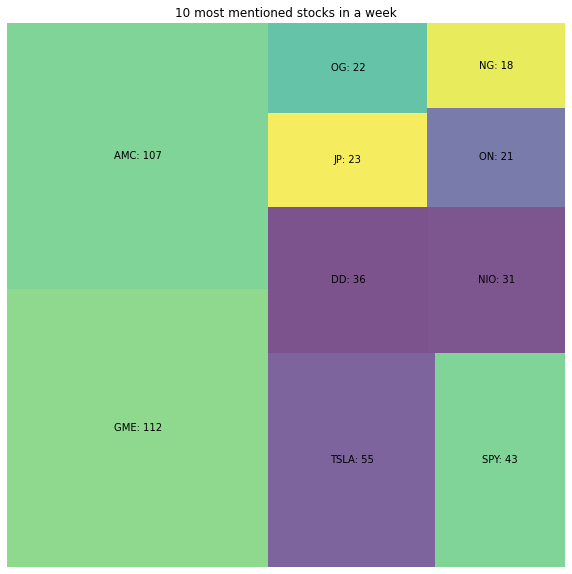

In [90]:
# Date Visualization
import squarify
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
# most mentioned picks    
squarify.plot(sizes=times, label=top, alpha=.7 )
plt.axis('off')
plt.title("10 most mentioned stocks in a week")
plt.show()

# Importing nltk library for sentiment analysis

In [76]:
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bikenkc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# New words ready to be added on the sentiment analysis analyzer

In [77]:
new_words = {
    'citron': -4.0,  
    'hidenburg': -4.0,        
    'moon': 4.0,
    'highs': 2.0,
    'mooning': 4.0,
    'long': 2.0,
    'short': -2.0,
    'call': 4.0,
    'calls': 4.0,    
    'put': -4.0,
    'puts': -4.0,    
    'break': 2.0,
    'tendie': 2.0,
     'tendies': 2.0,
     'town': 2.0,     
     'overvalued': -3.0,
     'undervalued': 3.0,
     'buy': 4.0,
     'sell': -4.0,
     'gone': -1.0,
     'gtfo': -1.7,
     'paper': -1.7,
     'bullish': 3.7,
     'bearish': -3.7,
     'bagholder': -1.7,
     'stonk': 1.9,
     'green': 1.9,
     'money': 1.2,
     'print': 2.2,
     'rocket': 2.2,
     'bull': 2.9,
     'bear': -2.9,
     'pumping': -1.0,
     'sus': -3.0,
     'offering': -2.3,
     'rip': -4.0,
     'downgrade': -3.0,
     'upgrade': 3.0,     
     'maintain': 1.0,          
     'pump': 1.9,
     'hot': 1.5,
     'drop': -2.5,
     'rebound': 1.5,  
     'crack': 2.5,}
#extremely positive should be +4
#extremely negative should be -4

# Ceated the model and added the new words

In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Applying Sentiment Analysis

 
vader = SentimentIntensityAnalyzer()
# adding custom words from data.py 
vader.lexicon.update(new_words)

# Created a function to create the dataframe that stores the average sentiment of each stocks based on positive,neutral,negative and compound score

In [79]:
def sentiment_score(symbols,titles):
    scores, s = {}, {}
    picks_sentiment = list(symbols.keys())
    for symbol in picks_sentiment:
        stock_title = titles[symbol]
        for title in stock_title:
            score = vader.polarity_scores(title)
            if symbol in s:
                s[symbol][title] = score
            else:
                s[symbol] = {title:score}      
            if symbol in scores:
                for key, _ in score.items():
                    scores[symbol][key] += score[key]
            else:
                scores[symbol] = score

        # calculating avg.
        for key in score:
            scores[symbol][key] = scores[symbol][key] / symbols[symbol]
            scores[symbol][key]  = "{pol:.3f}".format(pol=scores[symbol][key])

    # printing sentiment analysis 
    print("Sentiment analysis of top 10 picks:")
    df3 = pd.DataFrame(scores)
    df3.index = ['Bearish', 'Neutral', 'Bullish', 'Total/Compound']
    df3 = df3.T
    #df3.head(10)
    return df3

In [80]:
dataframe3=sentiment_score(symbols,titles)

Sentiment analysis of top 10 picks:


In [81]:
dataframe3

,Bearish,Neutral,Bullish,Total/Compound
GME,0.057,0.800,0.143,0.190
AMC,0.087,0.778,0.136,0.074
TSLA,0.128,0.720,0.151,0.050
SPY,0.064,0.750,0.186,0.175
DD,0.056,0.833,0.111,0.164
...,...,...,...,...
GLPG,0.000,0.904,0.096,0.572
JWN,0.000,1.000,0.000,0.000
DG,0.000,0.719,0.281,0.511
LGHL,0.000,1.000,0.000,0.000


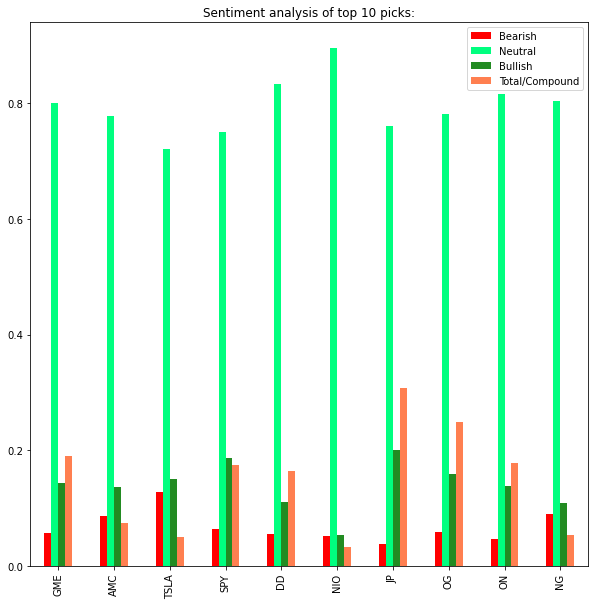

In [83]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


# Sentiment analysis
dataframe3 = dataframe3.astype(float)
colors = ['red', 'springgreen', 'forestgreen', 'coral']
dataframe3[0:10].plot(kind = 'bar', color=colors, title="Sentiment analysis of top 10 picks:")
plt.show()

In [85]:
dataframe3.reset_index(level=0,inplace=True)

In [86]:
dataframe3

,index,Bearish,Neutral,Bullish,Total/Compound
0,GME,0.057,0.800,0.143,0.190
1,AMC,0.087,0.778,0.136,0.074
2,TSLA,0.128,0.720,0.151,0.050
3,SPY,0.064,0.750,0.186,0.175
4,DD,0.056,0.833,0.111,0.164
...,...,...,...,...,...
442,GLPG,0.000,0.904,0.096,0.572
443,JWN,0.000,1.000,0.000,0.000
444,DG,0.000,0.719,0.281,0.511
445,LGHL,0.000,1.000,0.000,0.000


# Merged the sentiment dataframe and count of tickers dataframe

In [87]:
dataframe4=dataframe3.merge(dataframe2)

In [88]:
dataframe4

,index,Bearish,Neutral,Bullish,Total/Compound,Mentions
0,GME,0.057,0.800,0.143,0.190,112
1,AMC,0.087,0.778,0.136,0.074,107
2,TSLA,0.128,0.720,0.151,0.050,55
3,SPY,0.064,0.750,0.186,0.175,43
4,DD,0.056,0.833,0.111,0.164,36
...,...,...,...,...,...,...
442,GLPG,0.000,0.904,0.096,0.572,1
443,JWN,0.000,1.000,0.000,0.000,1
444,DG,0.000,0.719,0.281,0.511,1
445,LGHL,0.000,1.000,0.000,0.000,1


# Finally, saved the dataframe in csv file

In [89]:
dataframe4.to_csv('MentionsAndSentimentDec12Dec19.csv')